In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
#Shuffling the dataset and dropping unimportant columns
df = df.sample(frac = 1)
df = df.drop(['sepal_width','petal_length'], axis = 1)

In [4]:
train = df[:105]
test = df[105:]

In [5]:
def classes(train): 
    versicolor = train.loc[train['species']=='versicolor']
    setosa = train.loc[train['species']=='setosa']
    virginica = train.loc[train['species']=='virginica']
    return versicolor,setosa,virginica

In [6]:
def variance(dataset): 
    dataset_sepal_mean = dataset[['sepal_length']].mean(axis = 0)
    dataset_petal_mean = dataset[['petal_width']].mean(axis = 0)
   
    var1 = 0
    var2 = 0
    for index,rows in dataset.iterrows(): 
        
        var1+=(rows['sepal_length']-dataset_sepal_mean)**2
        var2+=(rows['petal_width']-dataset_petal_mean)**2
    return dataset_sepal_mean[0],dataset_petal_mean[0],var1[0]/len(dataset),var2[0]/len(dataset)

In [7]:

def test_model(test):
    
        
    correct = 0
    for index,rows in test.iterrows(): 
        
       

        I1 = rows['sepal_length']
        I2 = rows['petal_width']

        K1 = 1./np.sqrt(2*np.pi*versicolor_petal_var)
        K2 = 1./np.sqrt(2*np.pi*versicolor_sepal_var)
        T1 = np.exp(-((I1-versicolor_sepal_mean)**2)/(2*versicolor_sepal_var))
        T2 = np.exp(-((I2-versicolor_petal_mean)**2)/(2*versicolor_petal_var))
        probability_versi = P_versi*K1*K2*T1*T2

        K1 = 1./np.sqrt(2*np.pi*setosa_petal_var)
        K2 = 1./np.sqrt(2*np.pi*setosa_sepal_var)
        T1 = np.exp(-((I1-setosa_sepal_mean)**2)/(2*setosa_sepal_var))
        T2 = np.exp(-((I2-setosa_petal_mean)**2)/(2*setosa_petal_var))
        probability_setosa = P_setosa*K1*K2*T1*T2

        K1 = 1./np.sqrt(2*np.pi*virginica_petal_var)
        K2 = 1./np.sqrt(2*np.pi*virginica_sepal_var)
        T1 = np.exp(-((I1-virginica_sepal_mean)**2)/(2*virginica_sepal_var))
        T2 = np.exp(-((I2-virginica_petal_mean)**2)/(2*virginica_petal_var))
        probability_virginica = P_virg*K1*K2*T1*T2

        arr = ['versicolor','setosa','virginica']
        loc = np.argmax([probability_versi,probability_setosa,probability_virginica])
        if(arr[loc]==rows['species']):
            correct+=1
    return correct/len(test)

In [8]:
#Computing important parameter
def update_params(train):
    
    versicolor,setosa,virginica = classes(train)
    
    global versicolor_sepal_mean,versicolor_petal_mean,versicolor_sepal_var,versicolor_petal_var
    versicolor_sepal_mean,versicolor_petal_mean,versicolor_sepal_var,versicolor_petal_var = variance(versicolor)

    global setosa_sepal_mean,setosa_petal_mean,setosa_sepal_var,setosa_petal_var
    setosa_sepal_mean,setosa_petal_mean,setosa_sepal_var,setosa_petal_var = variance(setosa)

    global virginica_sepal_mean,virginica_petal_mean,virginica_sepal_var,virginica_petal_var
    virginica_sepal_mean,virginica_petal_mean,virginica_sepal_var,virginica_petal_var = variance(virginica)

    P_virg = len(virginica)/(len(virginica)+len(setosa)+len(versicolor))

    P_setosa = len(setosa)/(len(virginica)+len(setosa)+len(versicolor))

    P_versi = len(versicolor)/(len(virginica)+len(setosa)+len(versicolor))
    

In [9]:
def least_variance(pool):
    vari = 1000
    sel_rows = 0
    chosen_index = 0
    for index,rows in pool.iterrows(): 
        
        I1 = rows['sepal_length']
        I2 = rows['petal_width']

        K1 = 1./np.sqrt(2*np.pi*versicolor_petal_var)
        K2 = 1./np.sqrt(2*np.pi*versicolor_sepal_var)
        T1 = np.exp(-((I1-versicolor_sepal_mean)**2)/(2*versicolor_sepal_var))
        T2 = np.exp(-((I2-versicolor_petal_mean)**2)/(2*versicolor_petal_var))
        probability_versi = P_versi*K1*K2*T1*T2

        K1 = 1./np.sqrt(2*np.pi*setosa_petal_var)
        K2 = 1./np.sqrt(2*np.pi*setosa_sepal_var)
        T1 = np.exp(-((I1-setosa_sepal_mean)**2)/(2*setosa_sepal_var))
        T2 = np.exp(-((I2-setosa_petal_mean)**2)/(2*setosa_petal_var))
        probability_setosa = P_setosa*K1*K2*T1*T2

        K1 = 1./np.sqrt(2*np.pi*virginica_petal_var)
        K2 = 1./np.sqrt(2*np.pi*virginica_sepal_var)
        T1 = np.exp(-((I1-virginica_sepal_mean)**2)/(2*virginica_sepal_var))
        T2 = np.exp(-((I2-virginica_petal_mean)**2)/(2*virginica_petal_var))
        probability_virginica = P_virg*K1*K2*T1*T2
        
        test_var = np.var([probability_versi,probability_setosa,probability_virginica])
        
        if(test_var<vari): 
            sel_rows = rows
            chosen_index = index
            vari = test_var 
    return sel_rows,chosen_index

In [10]:
#Q1(a) Training the model and observing the accuracy.

versicolor,setosa,virginica = classes(train)

versicolor_sepal_mean,versicolor_petal_mean,versicolor_sepal_var,versicolor_petal_var = variance(versicolor)


setosa_sepal_mean,setosa_petal_mean,setosa_sepal_var,setosa_petal_var = variance(setosa)


virginica_sepal_mean,virginica_petal_mean,virginica_sepal_var,virginica_petal_var = variance(virginica)

P_virg = len(virginica)/(len(virginica)+len(setosa)+len(versicolor))

P_setosa = len(setosa)/(len(virginica)+len(setosa)+len(versicolor))

P_versi = len(versicolor)/(len(virginica)+len(setosa)+len(versicolor))
    
print("the accuracy observed on testing is",test_model(test))

the accuracy observed on testing is 0.9111111111111111


Text(0.5, 1.0, 'Accuracy variation during Active learning')

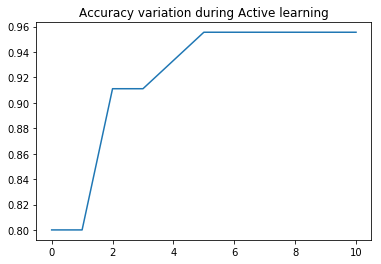

In [11]:
#Q1(b)Implementing active learning on the pool set.
test = pd.read_csv('test.csv')
pool = pd.read_csv('pool.csv')
train = pd.read_csv('training.csv')
update_params(train)
accuracy_list1 = [test_model(test)]

x1 = range(0,11)
y1 = accuracy_list1

for i in range(10):
    sel_rows,index = least_variance(pool)
    train = train.append(sel_rows)
    pool = pool.drop([index])
    update_params(train)
    accuracy_list1.append(test_model(test))

plt.plot(x1,y1)
plt.title('Accuracy variation during Active learning')

In [12]:
accuracy_list_mat = np.zeros([5,11])
for i in range(0,5):
    pool = pd.read_csv('pool.csv')
    train = pd.read_csv('training.csv')
    update_params(train)
    random.seed(i)
    accuracy_list2 = [test_model(test)]
    sel_numbers = []
    for j in range(10):
        index = random.randrange(1,len(pool))
        while(index in sel_numbers):
            index = random.randrange(1,len(pool))
    
        sel_numbers.append(index)
        sel_rows = pool.iloc[index]
        train = train.append(sel_rows)
        pool = pool.drop([index])
        update_params(train) 
        accuracy_list2.append(test_model(test))
    accuracy_list_mat[i,:] = accuracy_list2

mean_list = accuracy_list_mat.mean(axis = 0)
var_list = accuracy_list_mat.var(axis = 0)
upper_list = mean_list+np.sqrt(var_list)
lower_list = mean_list-np.sqrt(var_list) 

Text(0.5, 1.0, 'Active Learning v/s Random selection')

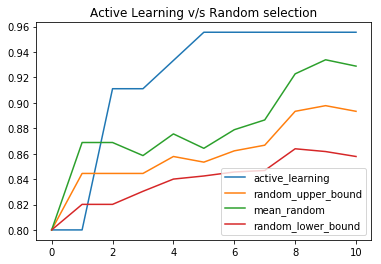

In [14]:
import matplotlib.pyplot as plt

x1 = range(0,11)
y1 = accuracy_list1
y2 = mean_list
y3 = upper_list
y4 = lower_list
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x1,y1)
ax.plot(x1,y2)
ax.plot(x1,y3)
ax.plot(x1,y4)
ax.legend(['active_learning','random_upper_bound','mean_random','random_lower_bound'])
plt.title('Active Learning v/s Random selection')

In [ ]:
#Part (b) Computing the Accuracy on the test set using active learning
#df = pd.read_csv('iris.csv')
#df = df.sample(frac = 1)
#df = df.drop(['sepal_width','petal_length'], axis = 1)
#train = df[:15]
#pool  = df[15:105]
#test  = df[105:]
#train.to_csv('training.csv')
#pool.to_csv('pool.csv') 
#test.to_csv('testing.csv')